In [1]:
from utils import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

### Carregando o Dataset

In [2]:
df = pd.read_csv('../data/raw_data/data.csv')

### Verificando valores NaN

In [3]:
# Verificando quais colunas possuem valores NaN
nan_train = df.isnull().sum()
nan_train = nan_train[nan_train > 0]

print(nan_train)

Series([], dtype: int64)


### Separando os Dados

In [4]:
# Alterando Variável Indoor para 0 ou 1
df['indoor'] = df['indoor'].apply(lambda val: 1 if val == True else 0)

In [5]:
df_indoor = df[df['indoor'] == 1]
df_outdoor = df[df['indoor'] == 0]

In [6]:
print("Indoor size: ", df_indoor.shape[0])
print("Outdoor size: ", df_outdoor.shape[0])

Indoor size:  4621
Outdoor size:  2154


In [7]:
df_train, df_val, df_test = split_and_balance(df_indoor, df_outdoor)

#### Plotando distribuição dos usuários no conjunto de treino

In [8]:
def plot_distribution_comp(df):
    colors = df['indoor'].map({1: 'red', 0: 'blue'})

    plt.scatter(df['lat'], df['lon'], c=colors, alpha=0.3, edgecolors='w', linewidth=0.5)
    plt.title('Latitude vs Longitude - Indoor')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.grid(True)

    plt.xlim(-8.06, -8.046)
    plt.ylim(-34.9605, -34.944)

    plt.show()

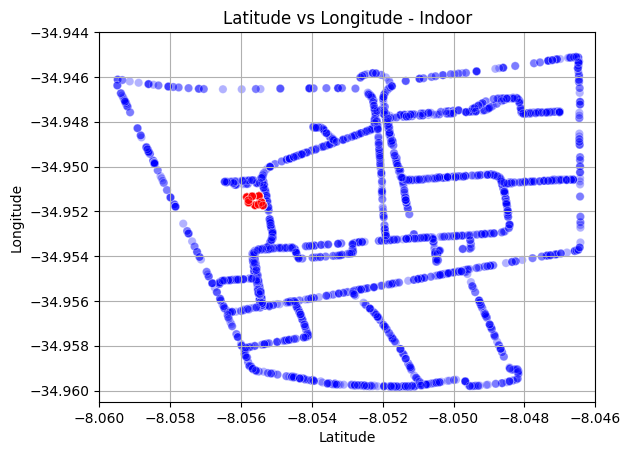

In [9]:
plot_distribution_comp(df_train)

In [10]:
map = plot_folium_map(df_indoor[['lat', 'lon']].values, df_outdoor[['lat', 'lon']].values, False, 'Outdoor', 'Indoor')
map

### Normalizando os dados

In [11]:
columns_to_normalize = [
    'rssi_1_1', 'rssi_1_2', 'rssi_1_3',
    'rssi_2_1', 'rssi_2_2', 'rssi_2_3',
    'rssi_3_1', 'rssi_3_2', 'rssi_3_3',
    'delay_1', 'delay_2', 'delay_3'
]

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(df_train[columns_to_normalize])

MinMaxScaler()

In [14]:
df_train[columns_to_normalize] = scaler.transform(df_train[columns_to_normalize])
df_val[columns_to_normalize] = scaler.transform(df_val[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])

In [15]:
df_train = pd.DataFrame(df_train)
df_val = pd.DataFrame(df_val)
df_test = pd.DataFrame(df_test)

In [16]:
df_train.head()

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.317523,0.527387,0.000000,0.666667,0.428571,0.285714,-8.055605,-34.951728,1
1,5532,0.182301,0.000000,0.180096,0.000000,0.171053,0.000000,0.291003,0.352840,0.110150,0.666667,0.428571,0.285714,-8.055784,-34.951608,1
2,9607,0.456080,0.551300,0.418441,0.257431,0.403415,0.426501,0.336851,0.464357,0.326409,0.333333,0.428571,0.857143,-8.046460,-34.946220,0
3,8265,0.532237,0.460564,0.534400,0.503367,0.787234,0.538737,0.332463,0.405254,0.278578,0.500000,0.142857,0.571429,-8.051810,-34.948510,0
4,8008,0.536607,0.579895,0.498791,0.624933,0.614968,0.256754,0.452570,0.417102,0.278578,0.500000,0.142857,0.571429,-8.052220,-34.948150,0


### Salvando os conjuntos

In [17]:
df_train.to_csv('../data/treated_data/train.csv', index=False)
df_val.to_csv('../data/treated_data/validation.csv', index=False)
df_test.to_csv('../data/treated_data/test.csv', index=False)